Chapter 20
# 将第四维数据映射到三维网格曲面
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sympy.abc import x, y
from sympy import lambdify, diff, exp, latex

# import os
# # 如果文件夹不存在，创建文件夹
# if not os.path.isdir("Figures"):
#     os.makedirs("Figures")

In [2]:
def mesh(num = 101):
    
    # number of mesh grids
    x_array = np.linspace(-3,3,num)
    y_array = np.linspace(-3,3,num)
    xx,yy = np.meshgrid(x_array,y_array)
    
    return xx, yy

In [3]:
xx, yy = mesh(num = 201)
# 用 sympy 库定义 MATLAB二元函数 peaks()
f_xy =  3*(1-x)**2*exp(-(x**2) - (y+1)**2)\
    - 10*(x/5 - x**3 - y**5)*exp(-x**2-y**2)\
    - 1/3*exp(-(x+1)**2 - y**2) 

f_xy_fcn = lambdify([x,y],f_xy)
# 将符号函数表达式转换为Python函数
f_xy_zz = f_xy_fcn(xx, yy)
# Reference: 
# https://www.mathworks.com/help/matlab/ref/peaks.html

### 1. 一般曲面 f(x,y)

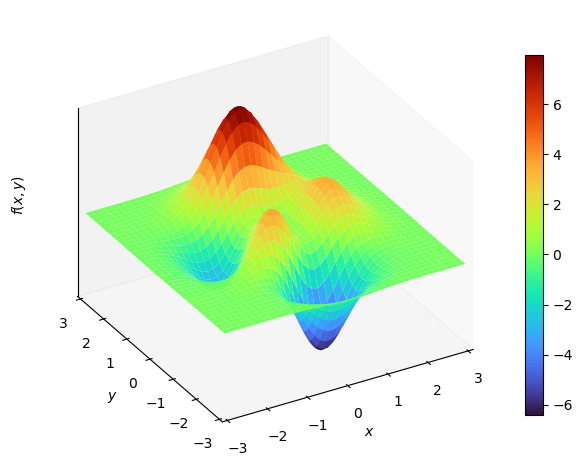

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

surf = ax.plot_surface(xx,yy,f_xy_zz, 
                       cmap='turbo',
                       linewidth=1, # 线宽
                       shade=False) # 删除阴影
ax.set_proj_type('ortho')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zticks([])
fig.colorbar(surf, shrink=0.8, aspect=20)
ax.view_init(azim=-120, elev=30)
# ax.view_init(azim=-135, elev=60)
plt.tight_layout()
ax.grid(False)
# fig.savefig('Figures/一般曲面.svg', format='svg')

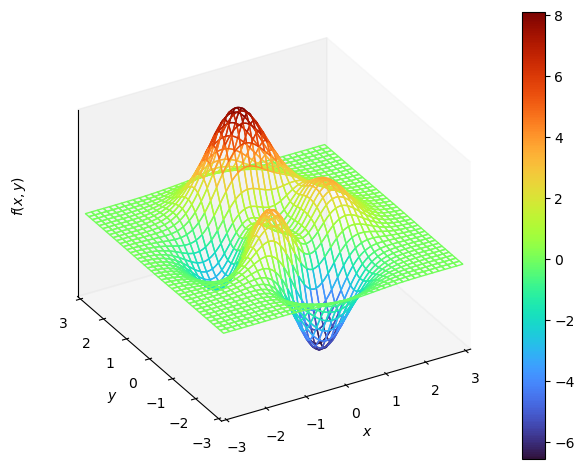

In [12]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

norm_plt = plt.Normalize(f_xy_zz.min(), f_xy_zz.max())
colors = cm.turbo(norm_plt(f_xy_zz))

surf = ax.plot_surface(xx,yy,f_xy_zz, 
                       facecolors=colors,
                       linewidth=1, # 线宽
                       shade=False) # 删除阴影
surf.set_facecolor((0,0,0,0))
ax.set_proj_type('ortho')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zticks([])
# m = cm.ScalarMappable(cmap=cm.turbo)
# m.set_array(f_xy_zz)
# plt.colorbar(m)
ax.view_init(azim=-120, elev=30)
# ax.view_init(azim=-135, elev=60)
plt.tight_layout()
ax.grid(False)
# fig.savefig('Figures/一般曲面.svg', format='svg')

### 2. 将第四维数据 V(x,y) 投影到三维曲面 f(x,y)

In [9]:
V = np.sin(xx) * np.sin(yy)
# V(x,y)

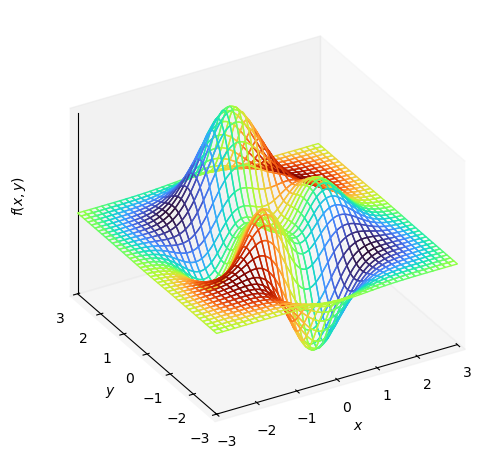

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

norm_plt = plt.Normalize(V.min(), V.max())
colors = cm.turbo(norm_plt(V))

surf = ax.plot_surface(xx,yy, f_xy_zz, 
                       facecolors=colors,
                       linewidth=1, shade=False)

surf.set_facecolor((0,0,0,0))

ax.set_proj_type('ortho')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zticks([])

ax.view_init(azim=-120, elev=30)
# ax.view_init(azim=-135, elev=60)
plt.tight_layout()
ax.grid(False)
# fig.savefig('Figures/将第四维数据投影到三维曲面.svg', format='svg')

In [ ]:
### 3. 调换第三 f(x,y)、四维 V(x,y)

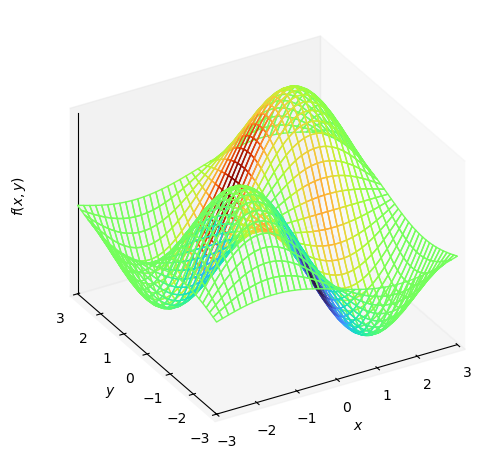

In [11]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

norm_plt = plt.Normalize(f_xy_zz.min(), f_xy_zz.max())
colors = cm.turbo(norm_plt(f_xy_zz))

surf = ax.plot_surface(xx,yy, V, 
                       facecolors=colors,
                       linewidth=1, shade=False)

surf.set_facecolor((0,0,0,0))
    
ax.set_proj_type('ortho')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zticks([])

ax.view_init(azim=-120, elev=30)
# ax.view_init(azim=-135, elev=60)
plt.tight_layout()
ax.grid(False)
# fig.savefig('Figures/调换第三、四维.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023